In [1]:
from keras import models, layers


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation= 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation= 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [6]:
from keras.utils import to_categorical
from keras.datasets import mnist

In [9]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

val_images = train_images[:10000]
x_train = train_images[10000:]
val_labels = train_labels[:10000]
y_train = train_labels[10000:]

In [11]:
model.compile(optimizer= 'rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])
history = model.fit(x_train, y_train, epochs= 20, batch_size= 64, validation_data= (val_images, val_labels))

Epoch 1/20
782/782 [==============================] - 12s 16ms/step - loss: 0.2010 - accuracy: 0.9384 - val_loss: 0.0630 - val_accuracy: 0.9813
Epoch 2/20
782/782 [==============================] - 11s 15ms/step - loss: 0.0518 - accuracy: 0.9841 - val_loss: 0.0537 - val_accuracy: 0.9834
Epoch 3/20
782/782 [==============================] - 11s 14ms/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0516 - val_accuracy: 0.9860
Epoch 4/20
782/782 [==============================] - 11s 14ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0401 - val_accuracy: 0.9898
Epoch 5/20
782/782 [==============================] - 11s 14ms/step - loss: 0.0209 - accuracy: 0.9937 - val_loss: 0.0476 - val_accuracy: 0.9869
Epoch 6/20
782/782 [==============================] - 11s 14ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0526 - val_accuracy: 0.9875
Epoch 7/20
782/782 [==============================] - 11s 14ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0492 - val_accuracy:

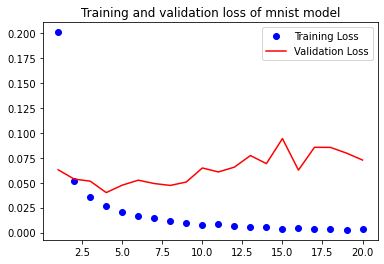

In [36]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label= 'Training Loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation Loss')
plt.title('Training and validation loss of mnist model')
plt.legend()
plt.savefig('Results/6_1/Loss.png');

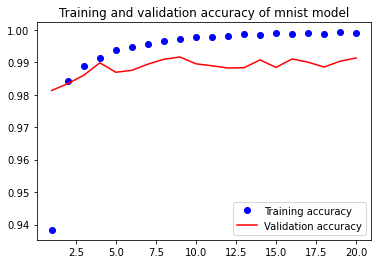

In [37]:
plt.plot(epochs, acc, 'bo', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation accuracy')
plt.title('Training and validation accuracy of mnist model')
plt.legend()
plt.savefig('Results/6_1/Accuracy.png');

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation= 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation= 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

model.compile(optimizer= 'rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])
model.fit(train_images, train_labels, epochs= 9, batch_size= 64)

Epoch 1/9
938/938 [==============================] - 13s 13ms/step - loss: 0.1837 - accuracy: 0.9426
Epoch 2/9
938/938 [==============================] - 12s 13ms/step - loss: 0.0492 - accuracy: 0.9849
Epoch 3/9
938/938 [==============================] - 12s 13ms/step - loss: 0.0329 - accuracy: 0.9900
Epoch 4/9
938/938 [==============================] - 12s 13ms/step - loss: 0.0248 - accuracy: 0.9924
Epoch 5/9
938/938 [==============================] - 12s 13ms/step - loss: 0.0191 - accuracy: 0.9942
Epoch 6/9
938/938 [==============================] - 12s 13ms/step - loss: 0.0161 - accuracy: 0.9951
Epoch 7/9
938/938 [==============================] - 12s 13ms/step - loss: 0.0127 - accuracy: 0.9958
Epoch 8/9
938/938 [==============================] - 12s 13ms/step - loss: 0.0105 - accuracy: 0.9968
Epoch 9/9
938/938 [==============================] - 12s 13ms/step - loss: 0.0097 - accuracy: 0.9969


In [38]:
model.save('Results/6_1/mode.h5')

In [22]:
result = model.evaluate(test_images, test_labels)
print(f'The model result for the test data is loss {result[0]} and accuracy {result[1]}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0335 - accuracy: 0.9915
The model reult for the test data is loss 0.03350549191236496 and accuracy 0.9915000200271606


In [40]:
import numpy as np
import pandas as pd
preds = model.predict(test_images)
pred_class = np.argmax(preds, axis= 1)
act = np.argmax(test_labels, axis= 1)
pred_df = pd.DataFrame({'Actual':act, 'Predicted':pred_class})
pred_df

Actual  Predicted
0          7          7
1          2          2
2          1          1
3          0          0
4          4          4
...      ...        ...
9995       2          2
9996       3          3
9997       4          4
9998       5          5
9999       6          6

[10000 rows x 2 columns]

In [41]:
pred_df.to_csv('Results/6_1/predictions.csv')